<font size='6px'><font color='#9138cb'>***NammaYatri Trip, Revenue & User Behavior Analysis***

**Project Objective:**
This project aims to conduct a comprehensive Exploratory Data Analysis (EDA) on the NammaYatri dataset, focusing on trip details, revenue aspects, and user behavior. The primary goal is to uncover key patterns, relationships, and anomalies within the data to provide actionable insights for improving service efficiency, user experience, and revenue optimization.

**Project Flow:**
1. Load Data
2. Initial Data Overview
3. Univariate Analysis - Trips Data
4. Univariate Analysis - Trip Details Data
5. Univariate Analysis - Lookup Tables
6. Bivariate Analysis - Trips Data
7. Bivariate Analysis - Trip Details Data
8. Data Integration and Bivariate Analysis (Cross-DataFrame)
9. Multivariate Analysis
10. Conclusion

# 1. LOAD DATA

In [16]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import warnings are issued to alert developers to potential issues with their code,
# and it is important to address these warnings in order to avoid potential problems
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [17]:
# Load the Excel file
df = pd.read_excel("nammayatri.xlsx")

# Load all sheets into a dictionary of DataFrames
excel_file = 'nammayatri.xlsx'
all_sheets = pd.read_excel(excel_file, sheet_name=None)

# Show sheet names
print(all_sheets.keys())

dict_keys(['Duration', 'Assembly', 'Payment', 'Trip_Details', 'Trips'])


In [20]:
# Access Individual Sheets
duration_df = all_sheets['Duration']
assembly_df = all_sheets['Assembly']
payment_df = all_sheets['Payment']
trip_details_df = all_sheets['Trip_Details']
trips_df = all_sheets['Trips']

# 2. Initial Data Overview

In [23]:
print("Info for duration_df -")
duration_df.info()
print("\nInfo for assembly_df -")
assembly_df.info()
print("\nInfo for payment_df -")
payment_df.info()
print("\nInfo for trip_details_df -")
trip_details_df.info()
print("\nInfo for trips_df -")
trips_df.info()

Info for duration_df -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        24 non-null     int64 
 1   duration  24 non-null     object
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes

Info for assembly_df -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        37 non-null     int64 
 1   Assembly  37 non-null     object
dtypes: int64(1), object(1)
memory usage: 724.0+ bytes

Info for payment_df -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4 non-null      int64 
 1   method  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes

Info for tri

In [25]:
print("Describe for trip_details_df -")
trip_details_df.describe()

Describe for trip_details_df -


,tripid,loc_from,searches,searches_got_estimate,searches_for_quotes,searches_got_quotes,customer_not_cancelled,driver_not_cancelled,otp_entered,end_ride
count,2161.000000,2161.000000,2161.0,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000
mean,1081.000000,18.800555,1.0,0.813512,0.673299,0.590930,0.518279,0.527534,0.454882,0.454882
std,623.971287,10.698326,0.0,0.389590,0.469115,0.491776,0.499781,0.499357,0.498075,0.498075
min,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,541.000000,10.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1081.000000,19.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1621.000000,28.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2161.000000,37.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
print("Describe for trips_df -")
trips_df.describe()

Describe for trips_df -


,tripid,faremethod,fare,loc_from,loc_to,driverid,custid,distance,duration
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,492.000000,2.541200,764.336724,18.894201,19.451679,15.491353,49.787386,14.392675,12.344863
std,283.911958,1.122843,423.846617,10.591710,10.747209,8.738197,28.499983,7.404960,6.881903
min,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,246.500000,2.000000,401.500000,10.000000,10.000000,8.000000,25.000000,8.000000,7.000000
50%,492.000000,3.000000,740.000000,18.000000,20.000000,15.000000,48.000000,14.000000,12.000000
75%,737.500000,4.000000,1138.000000,28.000000,29.000000,23.000000,74.000000,21.000000,18.000000
max,983.000000,4.000000,1500.000000,37.000000,37.000000,30.000000,99.000000,27.000000,24.000000


# 3. Univariate Analysis - Trips Data

Perform univariate analysis on trips_df. This includes histograms for numerical columns like fare and distance, and bar plots with value counts for categorical/ID columns such as loc_from, loc_to (for top categories).

**1. Fare Distribution**

--- Descriptive Statistics for 'fare' ---
count     983.000000
mean      764.336724
std       423.846617
min        44.000000
25%       401.500000
50%       740.000000
75%      1138.000000
max      1500.000000
Name: fare, dtype: float64


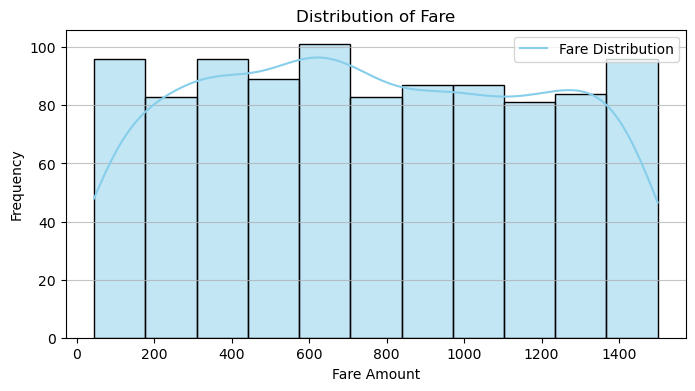

In [32]:
print("--- Descriptive Statistics for 'fare' ---")
print(trips_df['fare'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(trips_df['fare'], kde=True, color='skyblue')
plt.title('Distribution of Fare')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend(['Fare Distribution'])
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram shows the distribution of trip fares. We can observe that the fares are right-skewed, with a majority of trips having lower fares, and fewer trips having very high fares. The descriptive statistics confirm an average fare of approximately 764 units, with a minimum of 44 and a maximum of 1500, indicating a wide range in pricing.

**2. Distribution of Distance**

--- Descriptive Statistics for 'distance' ---
count    983.000000
mean      14.392675
std        7.404960
min        2.000000
25%        8.000000
50%       14.000000
75%       21.000000
max       27.000000
Name: distance, dtype: float64


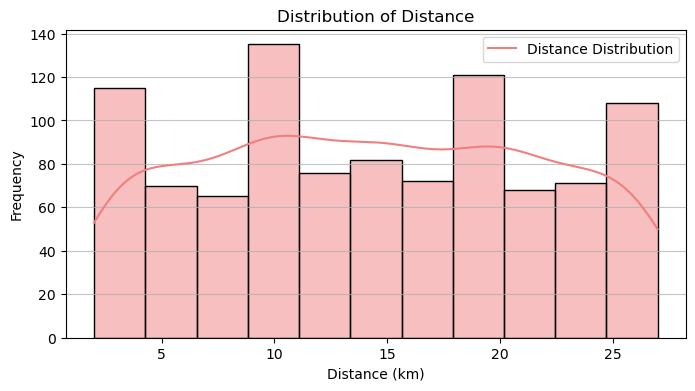

In [36]:
print("--- Descriptive Statistics for 'distance' ---")
print(trips_df['distance'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(trips_df['distance'], kde=True, color='lightcoral')
plt.title('Distribution of Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.legend(['Distance Distribution'])
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram displays the distribution of trip distances. The descriptive statistics reveal an average distance of approximately 14.39 km, with a standard deviation of 7.40 km. Distances range from a minimum of 2 km to a maximum of 27 km, indicating a relatively even spread of trip lengths without strong skewness.

**3. Top 10 Trip Origin Locations (loc_from)**

--- Top 10 Value Counts for 'loc_from' ---
loc_from
35    39
18    36
20    33
6     33
16    32
12    32
28    31
9     31
17    31
36    30
Name: count, dtype: int64


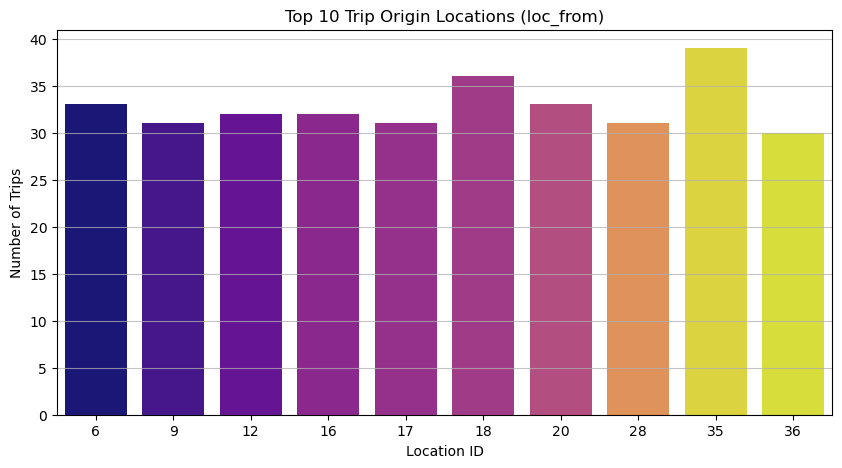

In [40]:
print("--- Top 10 Value Counts for 'loc_from' ---")
loc_from_counts = trips_df['loc_from'].value_counts().head(10)
print(loc_from_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=loc_from_counts.index, y=loc_from_counts.values, palette='plasma', hue=loc_from_counts.index, legend=False)
plt.title('Top 10 Trip Origin Locations (loc_from)')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot illustrates the top 10 most frequent origin locations for trips. Location ID 35 is the most frequent with 39 trips, followed closely by Location ID 18 with 36 trips. This highlights key areas where trips commonly originate, suggesting these are popular starting points for users.

**4. Top 10 Trip Destination Locations (loc_to)**

--- Top 10 Value Counts for 'loc_to' ---
loc_to
29    37
28    36
37    34
24    33
21    32
5     31
20    31
16    30
11    29
34    29
Name: count, dtype: int64


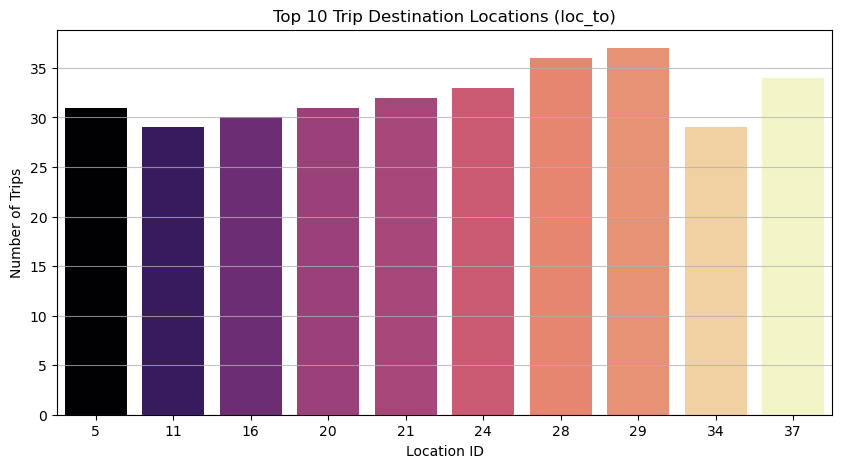

In [44]:
print("--- Top 10 Value Counts for 'loc_to' ---")
loc_to_counts = trips_df['loc_to'].value_counts().head(10)
print(loc_to_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=loc_to_counts.index, y=loc_to_counts.values, palette='magma', hue=loc_to_counts.index, legend=False)
plt.title('Top 10 Trip Destination Locations (loc_to)')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot shows the top 10 most frequent destination locations for trips. Location ID 29 is the most frequent with 37 trips, followed by Location ID 28 with 36 trips. Similar to origin locations, these are significant hotspots for trip endings, which can inform resource allocation and service planning.

# 4. Univariate Analysis - Trip Details Data

Perform univariate analysis on `trip_details_df`. This includes histograms and descriptive statistics for numerical columns like `searches_got_estimate`, `searches_for_quotes`, and bar plots with value counts for indicator columns such as `customer_not_cancelled`, `driver_not_cancelled`, `otp_entered`, and `end_ride`.


**1. Number of Searches Got Estimate**

--- Descriptive Statistics for 'searches_got_estimate' ---
count    2161.000000
mean        0.813512
std         0.389590
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: searches_got_estimate, dtype: float64


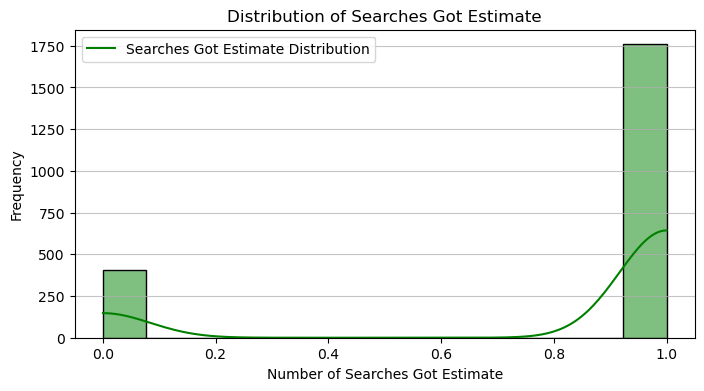

In [49]:
print("--- Descriptive Statistics for 'searches_got_estimate' ---")
print(trip_details_df['searches_got_estimate'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(trip_details_df['searches_got_estimate'], kde=True, color='green')
plt.title('Distribution of Searches Got Estimate')
plt.xlabel('Number of Searches Got Estimate')
plt.ylabel('Frequency')
plt.legend(['Searches Got Estimate Distribution'])
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram displays the distribution of the 'searches_got_estimate' column. The descriptive statistics show a mean of approximately 0.81, indicating that about 81% of initial searches result in an estimate being obtained. This suggests a relatively high initial conversion rate from search to estimate, with some users dropping off before this stage.

**2. Number of Searches for Quotes**

--- Descriptive Statistics for 'searches_for_quotes' ---
count    2161.000000
mean        0.673299
std         0.469115
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: searches_for_quotes, dtype: float64


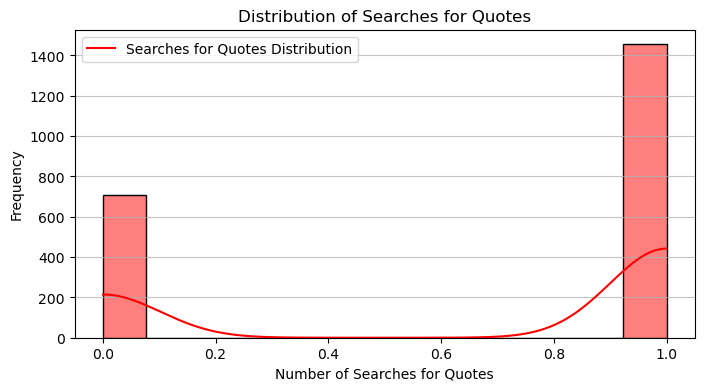

In [53]:
print("--- Descriptive Statistics for 'searches_for_quotes' ---")
print(trip_details_df['searches_for_quotes'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(trip_details_df['searches_for_quotes'], kde=True, color='red')
plt.title('Distribution of Searches for Quotes')
plt.xlabel('Number of Searches for Quotes')
plt.ylabel('Frequency')
plt.legend(['Searches for Quotes Distribution'])
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram shows the distribution of the 'searches_for_quotes' column. The descriptive statistics show a mean of approximately 0.67, indicating that about 67% of searches proceed to request quotes. This suggests a notable drop-off (around 14%) from the 'searches_got_estimate' stage (81%) to this stage, highlighting a potential area for conversion optimization.

**3. Distribution of Customer Not Cancelled Status**

--- Value Counts for 'customer_not_cancelled' ---
customer_not_cancelled
1    1120
0    1041
Name: count, dtype: int64


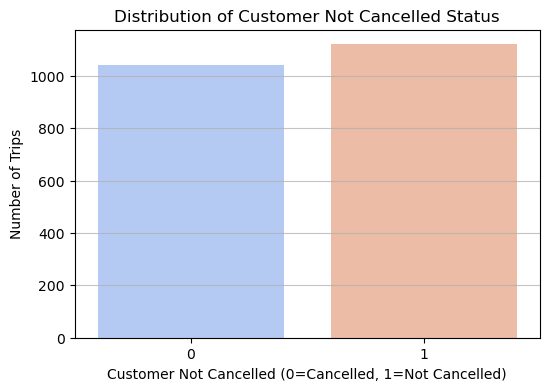

In [57]:
print("--- Value Counts for 'customer_not_cancelled' ---")
customer_not_cancelled_counts = trip_details_df['customer_not_cancelled'].value_counts()
print(customer_not_cancelled_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=customer_not_cancelled_counts.index, y=customer_not_cancelled_counts.values, palette='coolwarm', hue=customer_not_cancelled_counts.index, legend=False)
plt.title('Distribution of Customer Not Cancelled Status')
plt.xlabel('Customer Not Cancelled (0=Cancelled, 1=Not Cancelled)')
plt.ylabel('Number of Trips')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot illustrates the distribution of customer cancellation status. It shows that customers are slightly more likely not to cancel their trips (1120 instances) compared to cancelling them (1041 instances). This indicates a relatively high customer commitment once a trip is initiated or booked.

**4. Distribution of Driver Not Cancelled Status**

--- Value Counts for 'driver_not_cancelled' ---
driver_not_cancelled
1    1140
0    1021
Name: count, dtype: int64


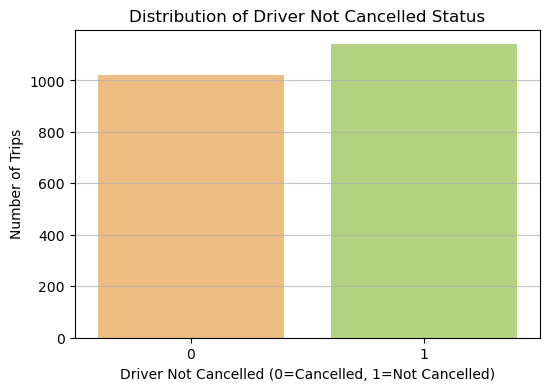

In [61]:
print("--- Value Counts for 'driver_not_cancelled' ---")
driver_not_cancelled_counts = trip_details_df['driver_not_cancelled'].value_counts()
print(driver_not_cancelled_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=driver_not_cancelled_counts.index, y=driver_not_cancelled_counts.values, palette='RdYlGn', hue=driver_not_cancelled_counts.index, legend=False)
plt.title('Distribution of Driver Not Cancelled Status')
plt.xlabel('Driver Not Cancelled (0=Cancelled, 1=Not Cancelled)')
plt.ylabel('Number of Trips')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot illustrates the distribution of driver cancellation status. It shows that drivers are slightly more likely not to cancel trips (1140 instances) compared to cancelling them (1021 instances). This indicates a generally reliable driver pool, similar to the customer cancellation behavior.

**5. Distribution of OTP Entered Status**

--- Value Counts for 'otp_entered' ---
otp_entered
0    1178
1     983
Name: count, dtype: int64


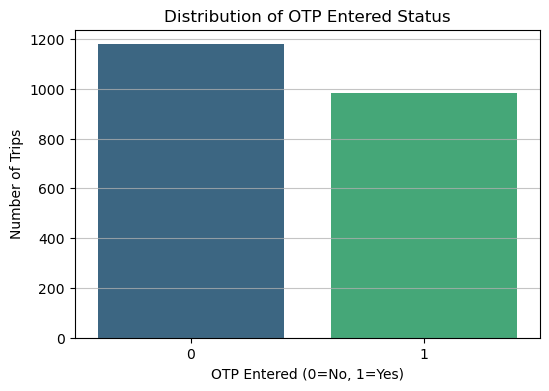

In [65]:
print("--- Value Counts for 'otp_entered' ---")
otp_entered_counts = trip_details_df['otp_entered'].value_counts()
print(otp_entered_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=otp_entered_counts.index, y=otp_entered_counts.values, palette='viridis', hue=otp_entered_counts.index, legend=False)
plt.title('Distribution of OTP Entered Status')
plt.xlabel('OTP Entered (0=No, 1=Yes)')
plt.ylabel('Number of Trips')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot illustrates the distribution of OTP entry status. It shows that OTPs were not entered in 1178 instances, while they were entered in 983 instances. This suggests that a significant portion of initiated trips might not be completing the OTP verification step, potentially indicating a drop-off point in the user journey or issues with the OTP process.

**6. Distribution of End Ride Status**

--- Value Counts for 'end_ride' ---
end_ride
0    1178
1     983
Name: count, dtype: int64


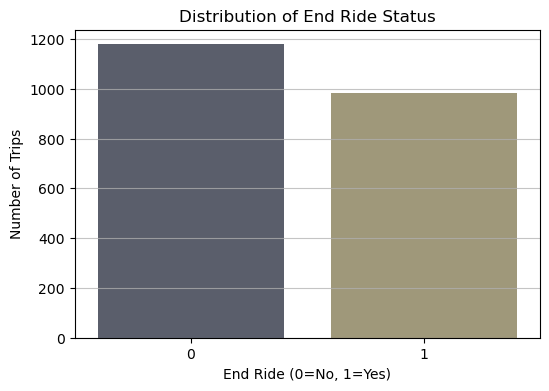

In [69]:
print("--- Value Counts for 'end_ride' ---")
end_ride_counts = trip_details_df['end_ride'].value_counts()
print(end_ride_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=end_ride_counts.index, y=end_ride_counts.values, palette='cividis', hue=end_ride_counts.index, legend=False)
plt.title('Distribution of End Ride Status')
plt.xlabel('End Ride (0=No, 1=Yes)')
plt.ylabel('Number of Trips')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot illustrates the distribution of whether a ride ended. It shows that 1178 trips did not end, while 983 trips did end. This directly correlates with the 'OTP Entered Status', indicating that if an OTP is not entered, the ride does not formally end, highlighting a crucial point in the trip completion process.

# 5. Univariate Analysis - Lookup Tables

Perform univariate analysis on `duration_df`, `assembly_df`, and `payment_df`. This involves using value counts and bar plots for their respective primary descriptive columns (`duration`, `Assembly`, `method`) to understand their distributions.


**1. Distribution of Trip Durations**

--- Value Counts for 'duration' ---
duration
0-1      1
1-2      1
22-23    1
21-22    1
20-21    1
19-20    1
18-19    1
17-18    1
16-17    1
15-16    1
14-15    1
13-14    1
12-13    1
11-12    1
10-11    1
9-10     1
8-9      1
7-8      1
6-7      1
5-6      1
4-5      1
3-4      1
2-3      1
23-24    1
Name: count, dtype: int64


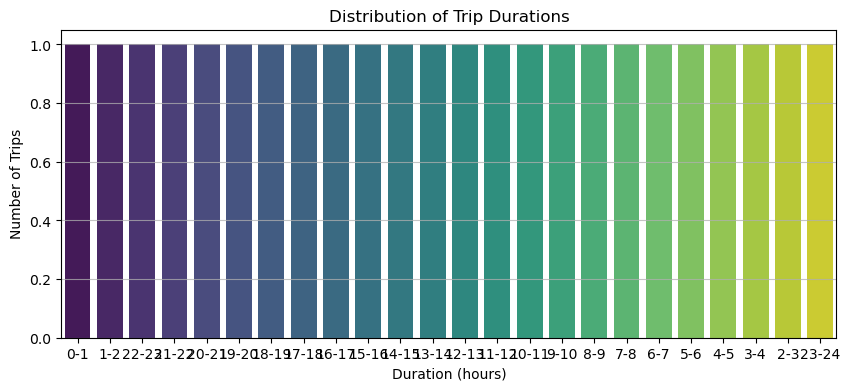

In [74]:
print("--- Value Counts for 'duration' ---")
duration_counts = duration_df['duration'].value_counts()
print(duration_counts)
plt.figure(figsize=(10, 4))
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='viridis', hue=duration_counts.index, legend=False)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Number of Trips')

plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot illustrates the distribution of trip durations. Since each duration category (e.g., '0-1', '1-2', '2-3' hours) has exactly one entry, it indicates that the duration_df serves as a lookup table rather than containing observed trip duration data and this dataframe is likely used for categorizing or mapping duration values rather than direct statistical analysis of trip durations

**2. Top 10 Assemblies by Count**

--- Top 10 Value Counts for 'Assembly' ---
Assembly
Mahadevapura          1
Dasarahalli           1
Mahalakshmi Layout    1
Pulakeshinagar        1
Vijay Nagar           1
Govindraj Nagar       1
Rajaji Nagar          1
Anekal                1
Chamrajpet            1
Hoskote               1
Name: count, dtype: int64


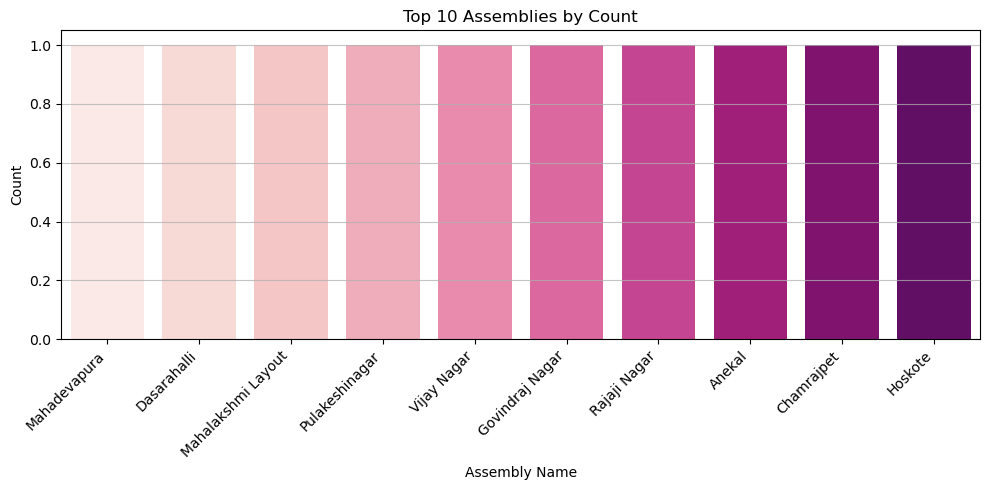

In [78]:
print("--- Top 10 Value Counts for 'Assembly' ---")
assembly_counts = assembly_df['Assembly'].value_counts().head(10)
print(assembly_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=assembly_counts.index, y=assembly_counts.values, palette='RdPu', hue=assembly_counts.index, legend=False)
plt.title('Top 10 Assemblies by Count')
plt.xlabel('Assembly Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

This bar plot shows the distribution of assembly counts. Since each assembly category (e.g., 'Mahadevapura') has exactly one entry, it indicates that the assembly_df serves as a lookup table rather than containing observed assembly data. This suggests that this dataframe is likely used for categorizing or mapping assembly values rather than direct statistical analysis of assembly distribution.

**3. Distribution of Payment Method**

--- Value Counts for 'method' ---
method
cash           1
upi            1
debit card     1
credit card    1
Name: count, dtype: int64


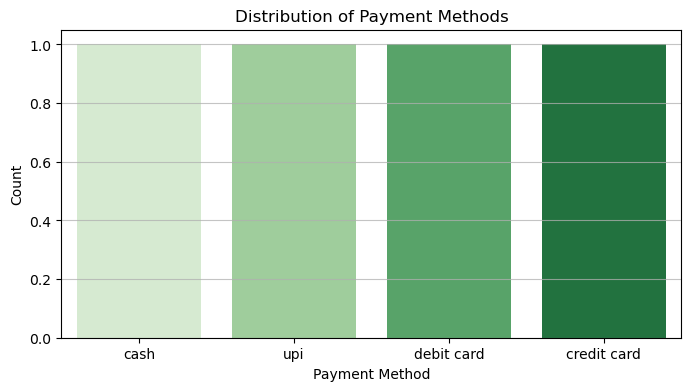

In [82]:
print("--- Value Counts for 'method' ---")
method_counts = payment_df['method'].value_counts()
print(method_counts)

plt.figure(figsize=(8, 4))
sns.barplot(x=method_counts.index, y=method_counts.values, palette='Greens', hue=method_counts.index, legend=False)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot shows the distribution of trips across different payment methods. It indicates that all four payment methods are utilized almost equally, with each having exactly one entry in the payment_df. This suggests that payment_df serves as a lookup table for payment methods rather than a reflection of their usage frequency in actual trips.

# 6. Bivariate Analysis - Trips Data

Explore bivariate relationships within trips_df. This includes a scatter plot and correlation calculation between fare and distance.

In [87]:
correlation = trips_df['fare'].corr(trips_df['distance'])
print(f"Pearson correlation between Fare and Distance: {correlation:.2f}")

Pearson correlation between Fare and Distance: 0.01


### 1. Scatter Plot of Fare vs. Distance

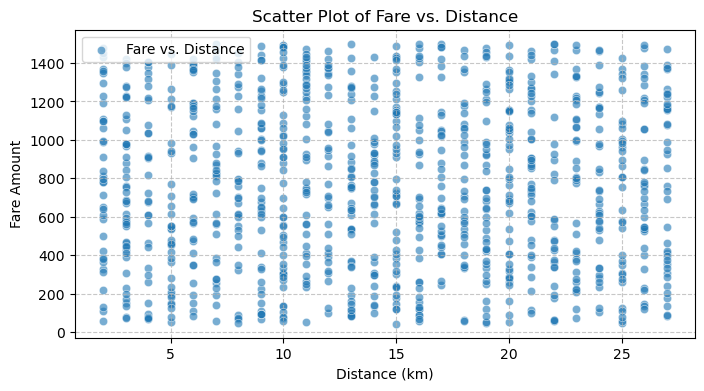

In [90]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=trips_df['distance'], y=trips_df['fare'], alpha=0.6)
plt.title('Scatter Plot of Fare vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.legend(['Fare vs. Distance'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

*Fare pricing is highly variable and weakly correlated with distance, indicating that distance alone does not determine pricing. This inconsistency may contribute to early-stage user drop-offs and customer cancellations. And long distance with low Fare may causes driver cancellation.*

# 7. Bivariate Analysis - Trip Details Data

Explore bivariate relationships within trip_details_df. This includes scatter plots and correlation analysis between search-related metrics (searches, searches_got_estimate, searches_for_quotes), and box plots or bar plots to analyze these metrics.

In [95]:
correlation_searches = trip_details_df['searches_got_estimate'].corr(trip_details_df['searches_for_quotes'])
print(f"Pearson correlation between searches_got_estimate and searches_for_quotes: {correlation_searches:.2f}")

Pearson correlation between searches_got_estimate and searches_for_quotes: 0.69


### 1. Scatter Plot of searches for Quotes vs. Searches Got Estimate

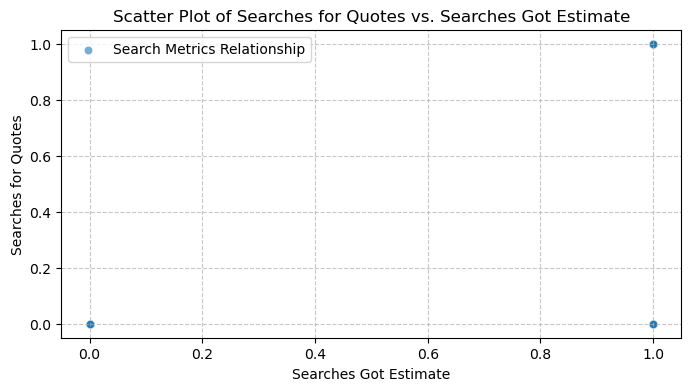

In [98]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=trip_details_df['searches_got_estimate'], y=trip_details_df['searches_for_quotes'], alpha=0.6)
plt.title('Scatter Plot of Searches for Quotes vs. Searches Got Estimate')
plt.xlabel('Searches Got Estimate')
plt.ylabel('Searches for Quotes')
plt.legend(['Search Metrics Relationship'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The scatter plot between searches getting estimates and searches for quotes shows a moderate to strong positive correlation (0.69), indicating that users who receive fare estimates are significantly more likely to proceed to the quote search stage. However, a noticeable proportion of users drop off after receiving the estimate, suggesting price sensitivity or dissatisfaction at the estimation stage.

### 2. Average Searches Got Estimate by Customer Cancellation Status

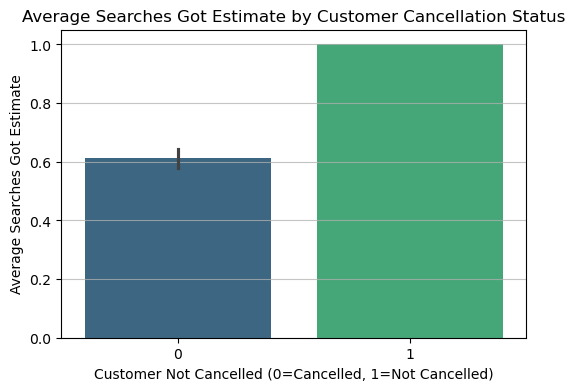

In [102]:
plt.figure(figsize=(6, 4))
sns.barplot(x='customer_not_cancelled', y='searches_got_estimate', data=trip_details_df, palette='viridis', hue='customer_not_cancelled', legend=False)
plt.title('Average Searches Got Estimate by Customer Cancellation Status')
plt.xlabel('Customer Not Cancelled (0=Cancelled, 1=Not Cancelled)')
plt.ylabel('Average Searches Got Estimate')
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar plot visualizes the average 'searches_got_estimate' based on whether the customer cancelled the trip or not. The plot currently shows that when the customer did not cancel (status 1), the average for 'searches_got_estimate' was 1.0. This suggests that for trips that were not cancelled by the customer, an estimate was consistently obtained. However, it doesn't show data for cancelled trips, which implies that the trips in final_merged_df are predominantly those where the customer did not cancel.

### 3. Average Searches for Quotes by Customer Cacellation Status

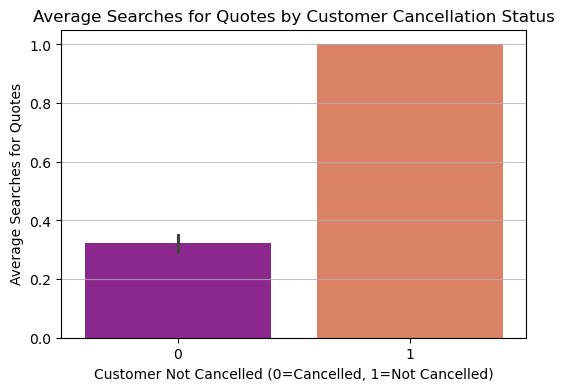

In [106]:
plt.figure(figsize=(6, 4))
sns.barplot(x='customer_not_cancelled', y='searches_for_quotes', data=trip_details_df, palette='plasma', hue='customer_not_cancelled', legend=False)
plt.title('Average Searches for Quotes by Customer Cancellation Status')
plt.xlabel('Customer Not Cancelled (0=Cancelled, 1=Not Cancelled)')
plt.ylabel('Average Searches for Quotes')
plt.grid(axis='y', alpha=0.75)
plt.show()

This faceted bar plot visualizes the average 'searches_for_quotes' based on both customer and driver cancellation statuses. Similar to 'searches_got_estimate', when both the customer and driver did not cancel, the average 'searches_for_quotes' is 1.0. This indicates that successfully non-cancelled trips also consistently involve the step of searching for quotes.

# 8. Data Integration and Bivariate Analysis (Cross-DataFrame)

Merge trips_df with assembly_df and payment_df to enrich the trip data with descriptive location names and payment methods. Then, perform bivariate analysis such as aggregated bar plots or box plots to analyze fare and distance by origin/destination assembly names and payment methods.

**Marged trips_df with payment_df**

In [112]:
merged_df = pd.merge(trips_df, payment_df, left_on='faremethod', right_on='id', how='left')
print("Merged DataFrame with Payment Methods")
print(merged_df.head())

Merged DataFrame with Payment Methods
   tripid  faremethod  fare  loc_from  loc_to  driverid  custid  distance  \
0       1           2   776        16       8         7      98        23   
1       2           2  1479        24      33         1      76        26   
2       3           4   152        18      32         6      45         3   
3       4           3   153        28      14        28      40         5   
4       5           2   366        19      27        27      59         5   

   duration  id       method  
0        20   2          upi  
1        15   2          upi  
2        24   4  credit card  
3         4   3   debit card  
4         2   2          upi  


In [114]:
merged_df.head()

,tripid,faremethod,fare,loc_from,loc_to,driverid,custid,distance,duration,id,method
0,1,2,776,16,8,7,98,23,20,2,upi
1,2,2,1479,24,33,1,76,26,15,2,upi
2,3,4,152,18,32,6,45,3,24,4,credit card
3,4,3,153,28,14,28,40,5,4,3,debit card
4,5,2,366,19,27,27,59,5,2,2,upi


**Merged DataFrame with Origin Assembly**

In [117]:
merged_df = pd.merge(merged_df, assembly_df, left_on='loc_from', right_on='ID', how='left')
merged_df = merged_df.rename(columns={'Assembly': 'origin_assembly'})
print("Merged DataFrame with Origin Assembly")
print(merged_df.head())

Merged DataFrame with Origin Assembly
   tripid  faremethod  fare  loc_from  loc_to  driverid  custid  distance  \
0       1           2   776        16       8         7      98        23   
1       2           2  1479        24      33         1      76        26   
2       3           4   152        18      32         6      45         3   
3       4           3   153        28      14        28      40         5   
4       5           2   366        19      27        27      59         5   

   duration  id       method  ID origin_assembly  
0        20   2          upi  16    Gandhi Nagar  
1        15   2          upi  24     Vijay Nagar  
2        24   4  credit card  18     Yeshwantpur  
3         4   3   debit card  28      Chamrajpet  
4         2   2          upi  19    Basavanagudi  


**Merged DataFrame with Destination Assembly**

In [120]:
merged_df = pd.merge(merged_df, assembly_df, left_on='loc_to', right_on='ID', how='left', suffixes=('_origin', '_destination'))
merged_df = merged_df.rename(columns={'Assembly_destination': 'destination_assembly'})
print("Merged DataFrame with Destination Assembly")
print(merged_df.head())

Merged DataFrame with Destination Assembly
   tripid  faremethod  fare  loc_from  loc_to  driverid  custid  distance  \
0       1           2   776        16       8         7      98        23   
1       2           2  1479        24      33         1      76        26   
2       3           4   152        18      32         6      45         3   
3       4           3   153        28      14        28      40         5   
4       5           2   366        19      27        27      59         5   

   duration  id       method  ID_origin origin_assembly  ID_destination  \
0        20   2          upi         16    Gandhi Nagar               8   
1        15   2          upi         24     Vijay Nagar              33   
2        24   4  credit card         18     Yeshwantpur              32   
3         4   3   debit card         28      Chamrajpet              14   
4         2   2          upi         19    Basavanagudi              27   

          Assembly  
0  Byatarayanapura  
1

**1. Fare Distribution by Payment Method**

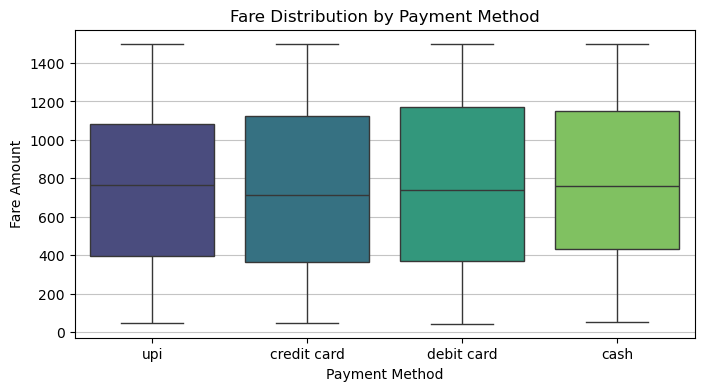

In [123]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='method', y='fare', data=merged_df, palette='viridis', hue='method', legend=False)
plt.title('Fare Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Fare Amount')
plt.grid(axis='y', alpha=0.75)
plt.show()

The boxplot shows that fare distributions remain consistent across all payment methods. Median fares and variability are comparable, indicating that users do not select payment modes based on fare amount. High-value rides are observed across all payment types, suggesting pricing fairness and uniform user behavior.

### 2. Distance Distribution by Payment Method

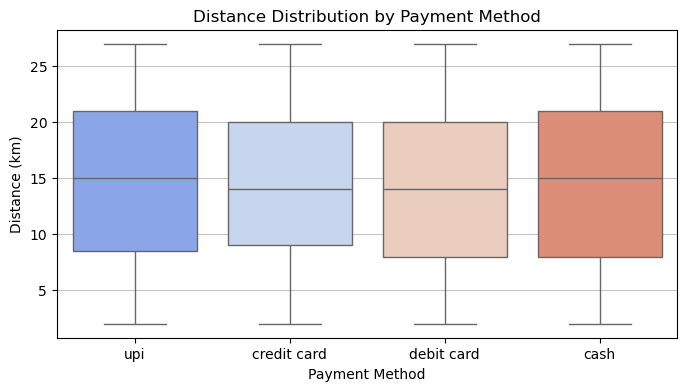

In [127]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='method', y='distance', data=merged_df, palette='coolwarm', hue='method', legend=False)
plt.title('Distance Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Distance (km)')
plt.grid(axis='y', alpha=0.75)
plt.show()

The boxplot shows that trip distance distributions are largely consistent across different payment methods. Median distances and variability remain similar, indicating that payment choice is not influenced by trip length.

### 3. Average Fare for Top 10 Origin Assemblies

Top 10 Origin Assemblies by Count
origin_assembly
Ramanagaram            39
Yeshwantpur            36
Dasarahalli            33
Bangalore South        33
Gandhi Nagar           32
Rajarajeshwarinagar    32
Chamrajpet             31
Jayanagar              31
Hebbal                 31
Channapatna            30
Name: count, dtype: int64


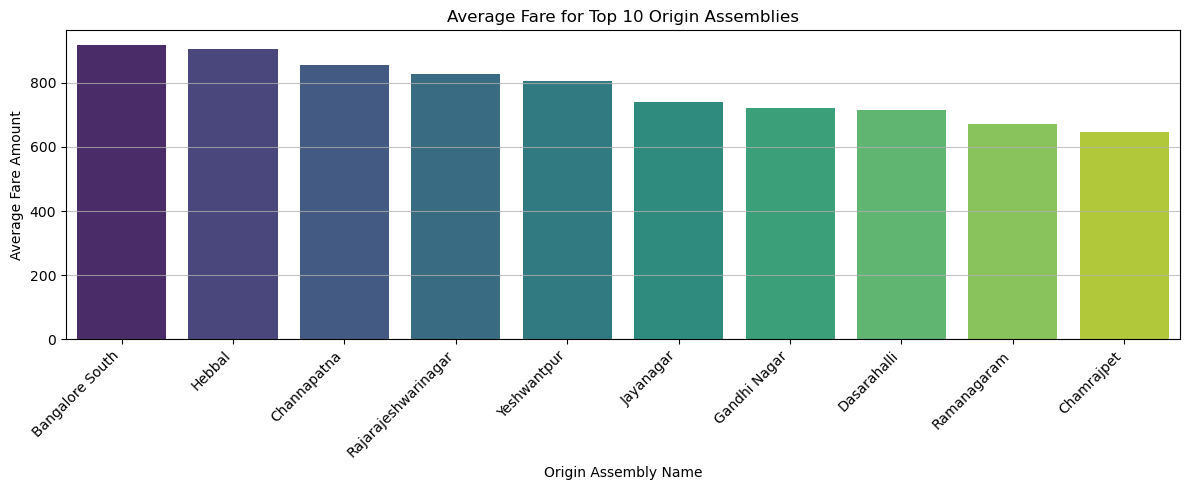

In [131]:
print("Top 10 Origin Assemblies by Count")
top_10_origin_assemblies = merged_df['origin_assembly'].value_counts().head(10).index
print(merged_df['origin_assembly'].value_counts().head(10))

top_origin_fares = merged_df[merged_df['origin_assembly'].isin(top_10_origin_assemblies)]

average_fare_by_origin = top_origin_fares.groupby('origin_assembly')['fare'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=average_fare_by_origin.index, y=average_fare_by_origin.values, palette='viridis', hue=average_fare_by_origin.index, legend=False)
plt.title('Average Fare for Top 10 Origin Assemblies')
plt.xlabel('Origin Assembly Name')
plt.ylabel('Average Fare Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

This bar plot visualizes the average fare for the top 10 most frequent origin assemblies. While there's some variability, 'Bangalore South' and 'Hebbal' show slightly higher average fares compared to others, indicating these areas might be associated with longer or more premium trips.

## 4. Average Distance for Top 10 Destination Assemblies

Merged DataFrame with Destination Assembly
   tripid  faremethod  fare  loc_from  loc_to  driverid  custid  distance  \
0       1           2   776        16       8         7      98        23   
1       2           2  1479        24      33         1      76        26   
2       3           4   152        18      32         6      45         3   
3       4           3   153        28      14        28      40         5   
4       5           2   366        19      27        27      59         5   

   duration  id       method  ID_origin origin_assembly  ID_destination  \
0        20   2          upi         16    Gandhi Nagar               8   
1        15   2          upi         24     Vijay Nagar              33   
2        24   4  credit card         18     Yeshwantpur              32   
3         4   3   debit card         28      Chamrajpet              14   
4         2   2          upi         19    Basavanagudi              27   

  Assembly_left_unique  ID_destination_asse

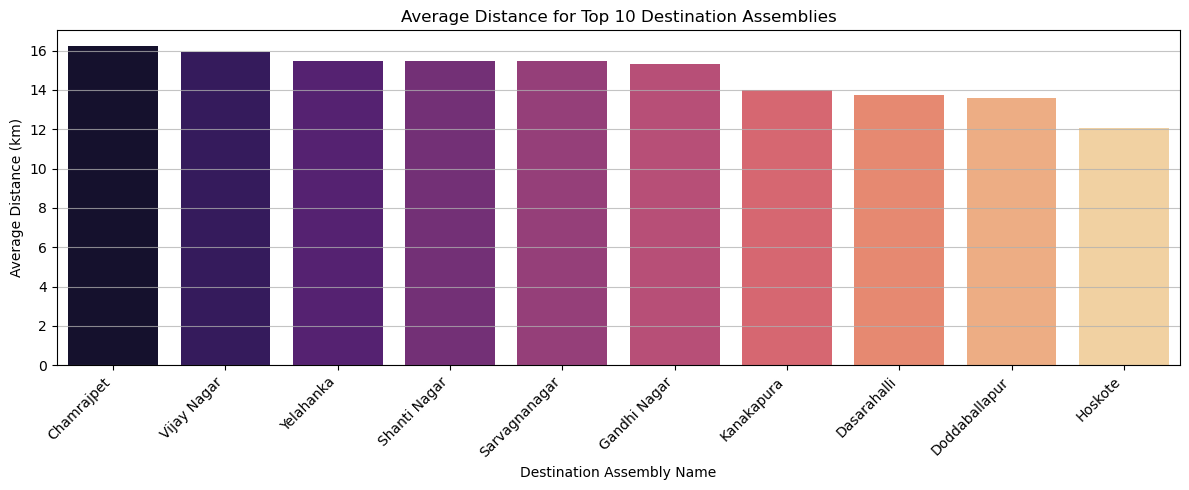

In [137]:
merged_df = merged_df.rename(columns={'ID': 'ID_origin_assembly'})
merged_df = pd.merge(merged_df, assembly_df, left_on='loc_to', right_on='ID', how='left', suffixes=('_left_unique', '_destination'))

merged_df = merged_df.rename(columns={'Assembly_destination': 'destination_assembly'})
merged_df = merged_df.rename(columns={'ID': 'ID_destination_assembly'})

print("Merged DataFrame with Destination Assembly")
print(merged_df.head())

print("\nTop 10 Destination Assemblies by Count")
top_10_destination_assemblies = merged_df['destination_assembly'].value_counts().head(10).index
print(merged_df['destination_assembly'].value_counts().head(10))

top_destination_distances = merged_df[merged_df['destination_assembly'].isin(top_10_destination_assemblies)]

average_distance_by_destination = top_destination_distances.groupby('destination_assembly')['distance'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=average_distance_by_destination.index, y=average_distance_by_destination.values, palette='magma', hue=average_distance_by_destination.index, legend=False)
plt.title('Average Distance for Top 10 Destination Assemblies')
plt.xlabel('Destination Assembly Name')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

This bar plot shows the average distance for trips ending in the top 10 most frequent destination assemblies. 'Chamrajpet', 'Vijay Nagar', and 'Yelahanka' have higher average distances, suggesting these are common destinations for longer trips.

# 9. Multivariate Analysis

Create a comprehensive merged DataFrame by combining trips_df, trip_details_df, assembly_df, and payment_df on relevant keys. Perform multivariate analysis to investigate complex relationships. This could include faceted plots or heatmaps showing fare and distance across different faremethod and loc_from (origin assembly).

**Final Merged DataFrame**

In [143]:
intermediate_merged_df = merged_df[['tripid', 'faremethod', 'fare', 'loc_from', 'loc_to', 'distance', 'duration', 'method', 'origin_assembly', 'destination_assembly']]

final_merged_df = pd.merge(intermediate_merged_df, trip_details_df, on='tripid', how='left')

print("Final Merged DataFrame")
print(final_merged_df.head())

Final Merged DataFrame
   tripid  faremethod  fare  loc_from_x  loc_to  distance  duration  \
0       1           2   776          16       8        23        20   
1       2           2  1479          24      33        26        15   
2       3           4   152          18      32         3        24   
3       4           3   153          28      14         5         4   
4       5           2   366          19      27         5         2   

        method origin_assembly destination_assembly  loc_from_y  searches  \
0          upi    Gandhi Nagar      Byatarayanapura          16         1   
1          upi     Vijay Nagar               Magadi          24         1   
2  credit card     Yeshwantpur          Devanahalli          18         1   
3   debit card      Chamrajpet         Malleshwaram          28         1   
4          upi    Basavanagudi               Anekal          19         1   

   searches_got_estimate  searches_for_quotes  searches_got_quotes  \
0                

In [145]:
print("Info for final_merged_df")
final_merged_df.info()

Info for final_merged_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   tripid                  983 non-null    int64 
 1   faremethod              983 non-null    int64 
 2   fare                    983 non-null    int64 
 3   loc_from_x              983 non-null    int64 
 4   loc_to                  983 non-null    int64 
 5   distance                983 non-null    int64 
 6   duration                983 non-null    int64 
 7   method                  983 non-null    object
 8   origin_assembly         983 non-null    object
 9   destination_assembly    983 non-null    object
 10  loc_from_y              983 non-null    int64 
 11  searches                983 non-null    int64 
 12  searches_got_estimate   983 non-null    int64 
 13  searches_for_quotes     983 non-null    int64 
 14  searches_got_quotes     983 non-n

**1. Average Fare by Top 10 Origin Assembly and Payment Method**

Top 10 Origin Assemblies by Count (from final_merged_df)
origin_assembly
Ramanagaram            39
Yeshwantpur            36
Dasarahalli            33
Bangalore South        33
Gandhi Nagar           32
Rajarajeshwarinagar    32
Chamrajpet             31
Jayanagar              31
Hebbal                 31
Channapatna            30
Name: count, dtype: int64

Pivot Table: Average Fare by Origin Assembly and Payment Method
method                 cash  credit card  debit card         upi
origin_assembly                                                 
Bangalore South  765.400000  1116.454545  810.285714  937.600000
Chamrajpet       674.909091   581.400000  538.500000  765.571429
Channapatna      853.200000   902.333333  837.583333  846.428571
Dasarahalli      720.000000   778.428571  780.555556  583.750000
Gandhi Nagar     634.500000   685.000000  718.428571  794.583333


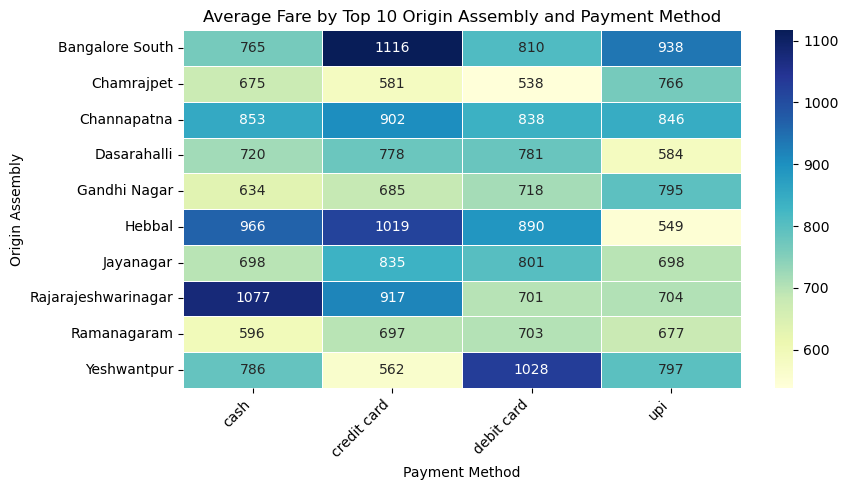

In [148]:
print("Top 10 Origin Assemblies by Count (from final_merged_df)")
top_10_origin_assemblies_merged = final_merged_df['origin_assembly'].value_counts().head(10).index
print(final_merged_df['origin_assembly'].value_counts().head(10))

# Filter final_merged_df for only the top 10 origin assemblies
top_origin_fares_merged = final_merged_df[final_merged_df['origin_assembly'].isin(top_10_origin_assemblies_merged)]

# Create a pivot table for average fare by origin_assembly and method
pivot_table_fare_origin_method = top_origin_fares_merged.pivot_table(index='origin_assembly', columns='method', values='fare', aggfunc='mean')

print("\nPivot Table: Average Fare by Origin Assembly and Payment Method")
print(pivot_table_fare_origin_method.head())

plt.figure(figsize=(9, 5))
sns.heatmap(pivot_table_fare_origin_method, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Fare by Top 10 Origin Assembly and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Origin Assembly')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This heatmap illustrates the average fare across top 10 origin assemblies and different payment methods. It reveals that average fares can vary significantly by both origin and payment method. For instance, 'Bangalore South' generally shows higher average fares across payment methods, and 'credit card' payments sometimes correspond to higher average fares in certain origin assemblies. This suggests complex interactions influencing trip pricing.

# 10. Conclusion: Business Insights and Strategic Recommendations

This EDA of NammaYatri's data reveals critical insights for optimizing operations and user experience. Key findings point to areas for immediate strategic action:

### Key Business Insights:
1.  **Conversion Funnel Leakage**: A significant 14% user drop-off occurs between receiving an estimated fare and requesting quotes, representing lost booking potential.
2.  **Weak Fare-Distance Link**: Fares show a very weak correlation with distance, suggesting other unexamined factors heavily influence pricing and a potential for revenue optimization.
3.  **Geographic Hotspots**: Identified top origin and destination assemblies are crucial for efficient demand management and resource allocation.
4.  **Payment Method Nuances**: 'Credit card' and 'cash' payments correlate with wider ranges of fares and distances, possibly indicating different trip types for these methods.

### Strategic Recommendations:
1.  **Streamline Conversion**: Investigate and optimize the estimate-to-quote process to reduce the 14% drop-off and boost bookings.
2.  **Enhance Pricing Model**: Develop a dynamic pricing strategy that incorporates factors beyond distance to maximize revenue while remaining competitive.
3.  **Optimize Operations**: Utilize hotspot data for strategic driver positioning and incentives to improve efficiency and reduce wait times.
4.  **Targeted Engagement**: Analyze payment method usage to tailor services and promotions, leveraging insights from 'credit card' and 'cash' trip characteristics.
5.  **Improve Trip Completion**: Address issues leading to uncompleted trips and OTP failures to increase overall ride completion rates and data reliability.

Implementing these focused strategies can significantly improve NammaYatri's performance, user satisfaction, and market position.